<a href="https://colab.research.google.com/github/ObadaEzz/Fashion-MNIST/blob/main/Task4(obada).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography 
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet 
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [1]:
import os
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import  matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import BatchNormalization,Dense,Conv2D,Input,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [2]:
#Getting training and testing data from tensorflow
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


28*28 image pixels

In [3]:
#Training Set shape
X_train.shape

(60000, 28, 28)

In [4]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels


In [5]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [6]:

X_train, X_val, y_train, y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=101)


## Some images with their labels 

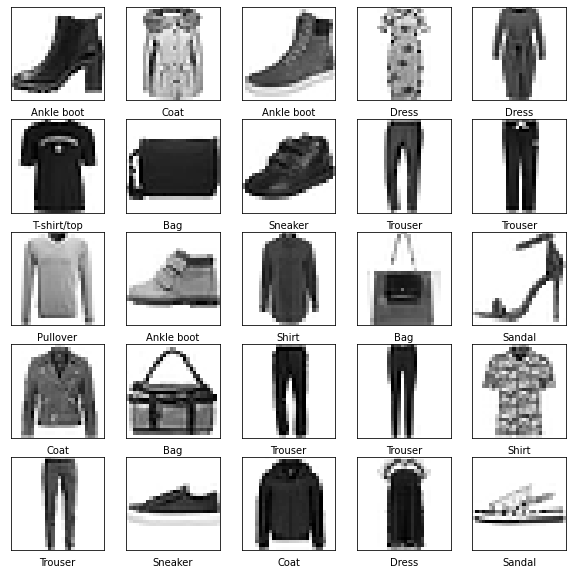

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.get_cmap('binary'))
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
# Rescaling training to range 0 to 1 by dividing them by 255
X_train = X_train / 255
X_val = X_val / 255

**Creating a Deep Neural Network with any number of layer you want.**

In [9]:
model = tf.keras.models.Sequential()


**Compiling the model.**

In [10]:
inputs  = tf.keras.layers.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs)
x= tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer= Adam(lr=0.01))

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [12]:
r = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5153 - accuracy: 0.8200 - val_loss: 0.4501 - val_accuracy: 0.8340
Epoch 2/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3878 - accuracy: 0.8607 - val_loss: 0.4049 - val_accuracy: 0.8585
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3460 - accuracy: 0.8747 - val_loss: 0.3550 - val_accuracy: 0.8745
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3223 - accuracy: 0.8825 - val_loss: 0.3334 - val_accuracy: 0.8796
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.8896 - val_loss: 0.3309 - val_accuracy: 0.8823
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2871 - accuracy: 0.8935 - val_loss: 0.3132 - val_accuracy: 0.8878
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2734 - accuracy: 0.8998 - val_loss: 0.3509 - val_accurac

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [13]:
history_dict = model.history.history
history_dict.keys()
loss_value = history_dict['accuracy']
val_loss_value = history_dict['val_accuracy']

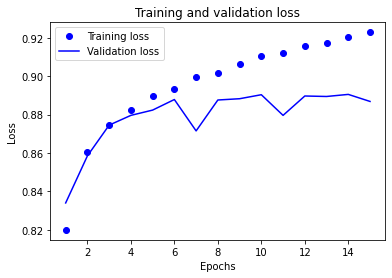

In [14]:
epochs = range(1,16)
plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [15]:
predictions = model.predict(X_test)
predict_labels = []
for pred in predictions:
    predict_labels.append(np.argmax(pred))

313/313 [==============================] - 1s 2ms/step


visualization

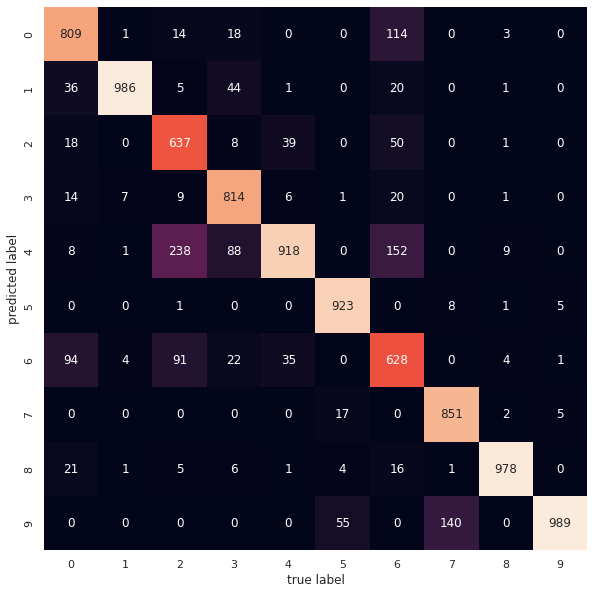

In [16]:
mat = confusion_matrix(Y_test, predict_labels)
plt.figure(figsize=(10, 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Find classification_report for the prediction

In [17]:
print(classification_report(predict_labels,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       959
           1       0.99      0.90      0.94      1093
           2       0.64      0.85      0.73       753
           3       0.81      0.93      0.87       872
           4       0.92      0.65      0.76      1414
           5       0.92      0.98      0.95       938
           6       0.63      0.71      0.67       879
           7       0.85      0.97      0.91       875
           8       0.98      0.95      0.96      1033
           9       0.99      0.84      0.91      1184

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.87      0.85      0.85     10000



Use model.evaluate the test data

In [18]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 70.2414 - accuracy: 0.8533
70.24143981933594 0.8532999753952026
